In [314]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [315]:
bitcoin = pd.read_csv('BTC-GBP.csv', index_col='Date', parse_dates= True)

In [316]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,286.456390,287.523193,278.037109,281.176758,281.176758,12946080.0
2014-09-18,280.885315,281.075409,252.261856,258.426697,258.426697,20995616.0
2014-09-19,258.221497,259.372528,235.115875,242.429230,242.429230,23285047.0
2014-09-20,242.353699,259.929993,239.412338,251.092407,251.092407,22636536.0
2014-09-21,250.589493,253.255142,241.437515,244.570435,244.570435,16299809.0


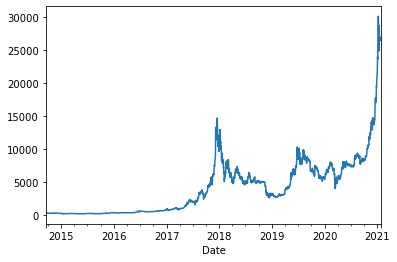

In [317]:
bitcoin['Close'].plot()
plt.show()

In [318]:
#changer les index
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26'],
              dtype='datetime64[ns]', name='Date', length=2324, freq=None)

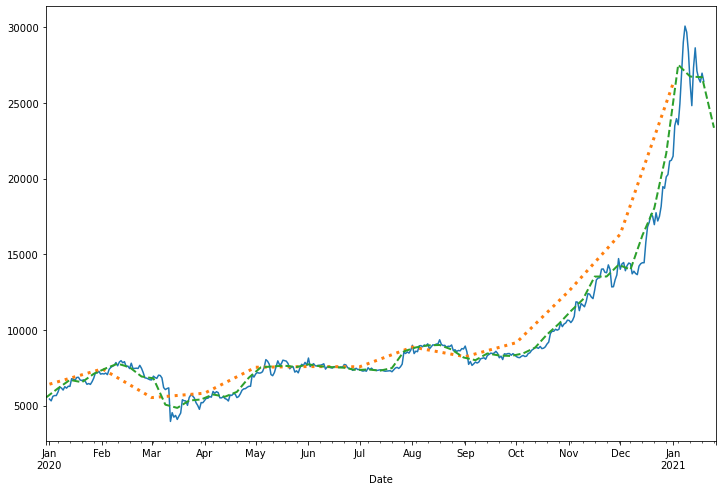

In [319]:
plt.figure(figsize=(12,8))
bitcoin['2020': '2021']['Close'].plot()
bitcoin['2020': '2021']['Close'].resample('M').mean().plot(label='Par mois', lw=3,ls=':')
bitcoin['2020': '2021']['Close'].resample('W').mean().plot(label='Par semaine',lw=2, ls='--')
plt.show()

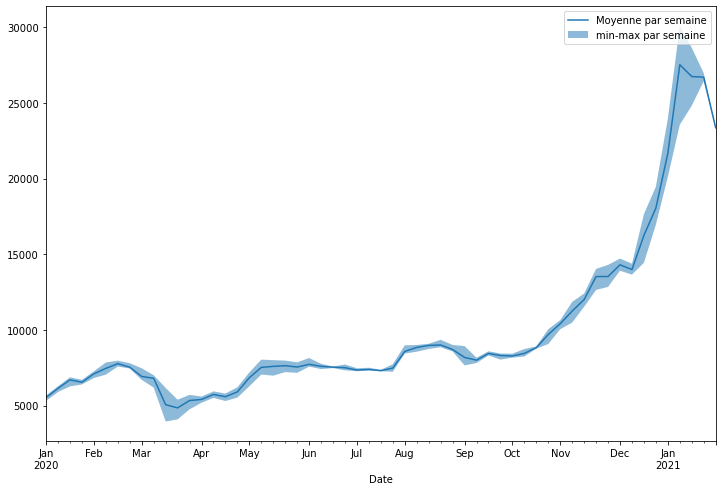

In [320]:
m = bitcoin['2020': '2021']['Close'].resample('W').agg(['mean','std','min', 'max'])

plt.figure(figsize=(12,8))
m['mean']['2020':'2021'].plot(label='Moyenne par semaine')
plt.fill_between(m.index,  m['max'], m['min'], alpha=0.5, label='min-max par semaine')

plt.legend()
plt.show()

## Moving average

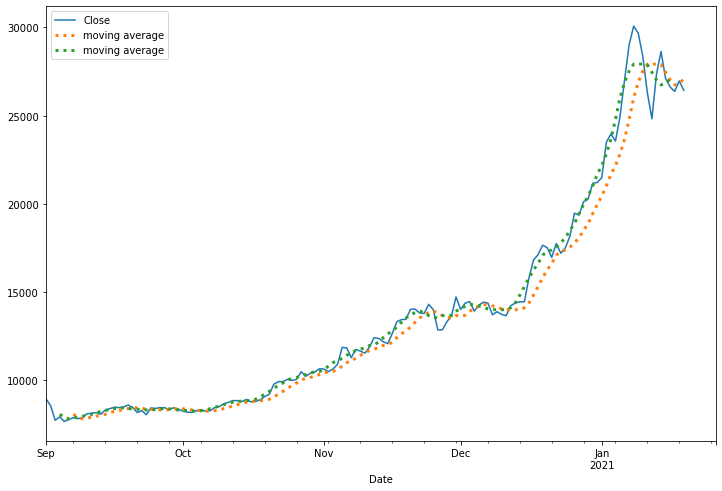

In [321]:
plt.figure(figsize=(12,8))
bitcoin['2020-09': '2021']['Close'].plot()
bitcoin['2020-09': '2021']['Close'].rolling(window=7).mean().plot(label='moving average', ls=':', lw=3)
bitcoin['2020-09': '2021']['Close'].rolling(window=7, center=True).mean().plot(label='moving average', ls=':', lw=3)
plt.legend()
plt.show()

## Exp weighted function

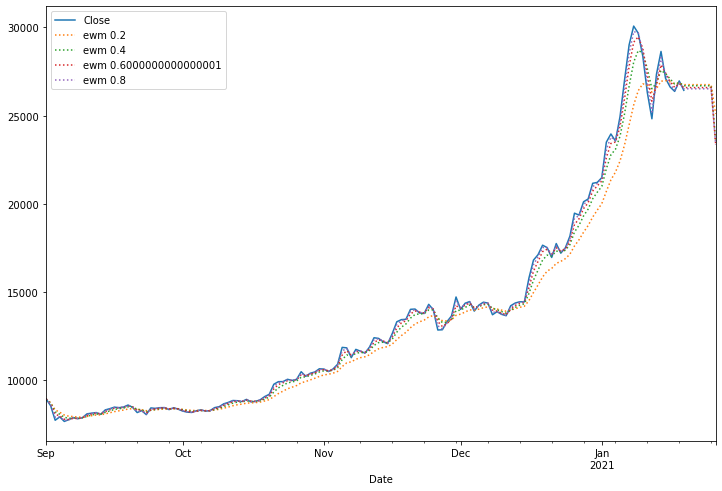

In [322]:
plt.figure(figsize=(12,8))
bitcoin['2020-09': '2021']['Close'].plot()
for i in np.arange(0.2,1,0.2):
    bitcoin['2020-09': '2021']['Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls=':')
plt.legend()
plt.show()

# Merge series

In [323]:
ethereum = pd.read_csv('ETH-GBP.csv', index_col='Date',parse_dates=True)

<AxesSubplot:xlabel='Date'>

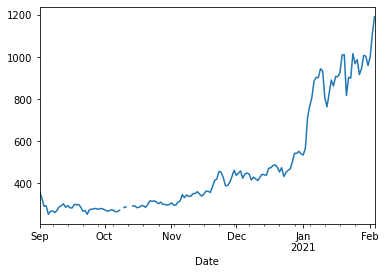

In [324]:
ethereum['2020-09': '2021']['Close'].plot()

In [325]:
btc_eth = pd.merge(bitcoin,ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

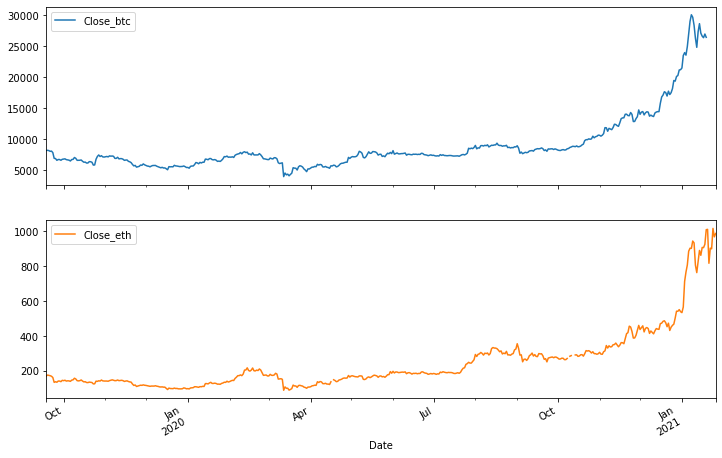

In [326]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True,figsize=(12,8))

In [327]:
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.969111
Close_eth,0.969111,1.000000


# Exercise

In [378]:
max_btc = bitcoin['2019-01':'2019-09']['Close'].rolling(window=28).max()
min_btc = bitcoin['2019-01':'2019-09']['Close'].rolling(window=28, center=True).min()

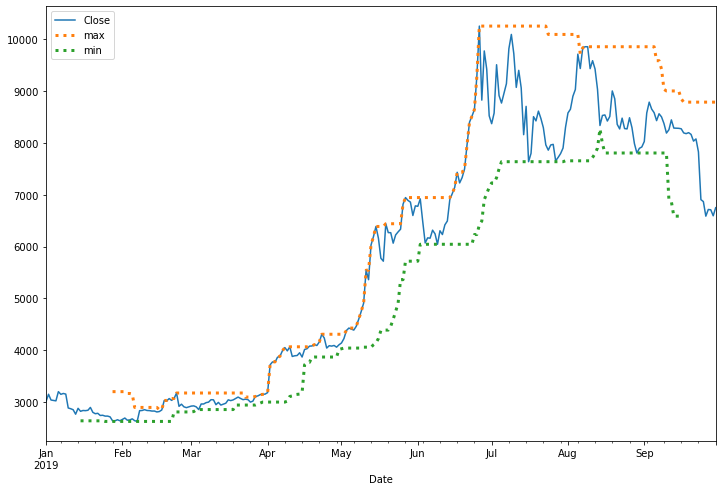

In [379]:
plt.figure(figsize=(12,8))
bitcoin['2019-01':'2019-09']['Close'].plot()
max_btc.plot(label='max', ls=':', lw=3)
min_btc.plot(label='min', ls=':', lw=3)
plt.legend()
plt.show()

In [381]:
bitcoin['2019-01':'2019-09']['buy'] = np.where(bitcoin['2019-01':'2019-09']['Close'] >= max_btc, 1, 0)
bitcoin['2019-01':'2019-09']['sell'] = np.where(bitcoin['2019-01':'2019-09']['Close'] <= min_btc, -1, 0)

<ipython-input-381-53b07c27c711>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin['2019-01':'2019-09']['buy'] = np.where(bitcoin['2019-01':'2019-09']['Close'] >= max_btc, 1, 0)
<ipython-input-381-53b07c27c711>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin['2019-01':'2019-09']['sell'] = np.where(bitcoin['2019-01':'2019-09']['Close'] <= min_btc, -1, 0)


<AxesSubplot:xlabel='Date'>

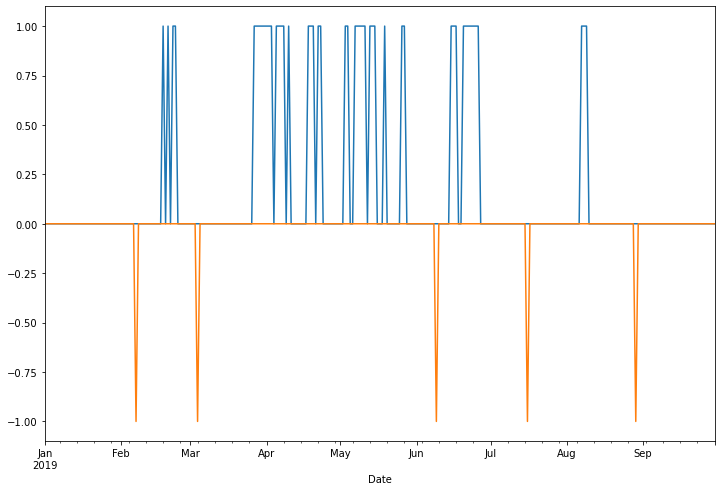

In [383]:
plt.figure(figsize=(12,8))
bitcoin['2019-01':'2019-09']['buy'].plot()
bitcoin['2019-01':'2019-09']['sell'].plot()